In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

C:\Users\lenovo\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Book Recomentaton

In [259]:
books=pd.read_csv('C:/Users/lenovo/Desktop/recom_Data/books.csv')
print(type(books))
books.head()

<class 'pandas.core.frame.DataFrame'>


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [204]:
books.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12-01-1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,08-01-1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco,NaN
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9.7885E+12,spa,272,113,12,5/28/2006,Edimat Libros,NaN


In [163]:
books.shape

(11127, 13)

In [164]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [260]:
books.pop('Unnamed: 12')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
11097    NaN
11098    NaN
11099    NaN
11100    NaN
11101    NaN
11102    NaN
11103    NaN
11104    NaN
11105    NaN
11106    NaN
11107    NaN
11108    NaN
11109    NaN
11110    NaN
11111    NaN
11112    NaN
11113    NaN
11114    NaN
11115    NaN
11116    NaN
11117    NaN
11118    NaN
11119    NaN
11120    NaN
11121    NaN
11122    NaN
11123    NaN
11124    NaN
11125    NaN
11126    NaN
Name: Unnamed: 12, Length: 11127, dtype: object

In [230]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
bookID                11127 non-null int64
title                 11127 non-null object
authors               11127 non-null object
average_rating        11127 non-null object
isbn                  11127 non-null object
isbn13                11127 non-null object
language_code         11127 non-null object
  num_pages           11127 non-null object
ratings_count         11127 non-null int64
text_reviews_count    11127 non-null int64
publication_date      11127 non-null object
publisher             11127 non-null object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [167]:
books.shape

(11127, 12)

Observations:

The data seems to have no missing values. There are total 11127 rows with total 12 columns with the range index from 0 to 11126.

There are 3 numerical columns with 3 int64 values and 0 float64 and 9 categorical (object) values. We can see that the column publication_date has the dtype as object.

We'll need to change that to datetime.

In the column names, we can see that num_pages is indented.

Overall the data looks in order. Memory usage: 1.0 MB

In [261]:
#In the column names, we can see that num_pages is indented.remove it
books.rename(columns={'  num_pages': 'num_pages'},inplace=True)

In [232]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [208]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [171]:
books.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [172]:
#Any missing values?
books.isnull().sum().values.any()

False

In [173]:
#Let's check the unique values
for i in books.columns:
    print('\n',i,'\n\n',books[i].unique())


 bookID 

 [    1     2     4 ... 45634 45639 45641]

 title 

 ['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']

 authors 

 ['J.K. Rowling/Mary GrandPré' 'J.K. Rowling' 'W. Frederick Zimmerman' ...
 'C.S. Lewis/Ana Falcão Bastos'
 'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos'
 'William T. Vollmann/Larry McCaffery/Michael Hemmingson']

 average_rating 

 ['4.57' '4.49' '4.42' '4.56' '4.78' '3.74' '4.73' '4.38' '4.22' '4.21'
 '3.44' '3.87' '4.07' '3.9' '3.83' '3.86' '3.91' '3.93' '4.59' '4.5'
 '4.36' '4.53' '3.84' '3.72' '4' '3.88' '4.33' '3.45' '3.76' '3.6' '4.06'
 '4.17' '3.55' '3.98' '4.13' '3.95' '4.24' '4.34' '3.92' '4.23' '3.75'
 '3.94' '3.77' '4.46' '3.68' '3.99' '3.25' '3.89' '3.82' '3.78' '4.01'
 '4.35' '4.28' '3.34' '3.67' '3.48' '3.5' '3.62' '4.27' '3.39'

In [174]:
#Book with maximum rating count
print('\nBook with maximum rating count=',books['ratings_count'].max())
max_rating=books[books['ratings_count'] == books['ratings_count'].max()]
max_rating


Book with maximum rating count= 4597666


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.78032E+12,eng,501,4597666,94265,09-06-2006,Little Brown and Company


Observations

Twilight by Stephenie Meyer published in 9/6/2006 by Little Brown and Company publisher has the highest ratings_count of 4597666.

Average_rating for this books is 3.5900 and text_review_counts is 94265

In [175]:
# substring to be searched
sub ='J'
# seaching books by authors name 
#Series.str.find(sub, start=0, end=None)
books[books['authors'] == books['authors'].str.find(sub,start=0,end=None)]


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


Total number of books with highest and lowest average rating

In [176]:

#Dividing numeric and categorical columns

numerical = books.select_dtypes(['float64','int64']).columns.values.tolist()
categorical = books.select_dtypes(['object']).columns.values.tolist()
print('Numerical Columns\n\n',numerical)
print()
print('Categorical Columns\n\n',categorical)


Numerical Columns

 ['bookID', 'ratings_count', 'text_reviews_count']

Categorical Columns

 ['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'publication_date', 'publisher']


In [177]:
books.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11-01-2003,Scholastic


In [262]:
#Changing data types of some columns like isbn into int64 
#average_rating (obj into float64)
books['average_rating']=pd.to_numeric(books['average_rating'],errors='coerce').fillna(0).astype(float)
books['isbn']=pd.to_numeric(books['isbn'],errors='coerce').fillna(0).astype(int)
books['isbn13']=pd.to_numeric(books['isbn13'],errors='coerce').fillna(0).astype(float)
books['num_pages']=pd.to_numeric(books['num_pages'],errors='coerce').fillna(0).astype(int)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
bookID                11127 non-null int64
title                 11127 non-null object
authors               11127 non-null object
average_rating        11127 non-null float64
isbn                  11127 non-null int32
isbn13                11127 non-null float64
language_code         11127 non-null object
num_pages             11127 non-null int32
ratings_count         11127 non-null int64
text_reviews_count    11127 non-null int64
publication_date      11127 non-null object
publisher             11127 non-null object
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 956.3+ KB


In [234]:
books.describe()

,bookID,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.932661,5.141990e+08,9.756372e+12,336.284623,1.793649e+04,541.864474
std,13093.358023,0.358271,7.352721e+08,4.799847e+11,241.193601,1.124794e+05,2576.174610
min,1.000000,0.000000,-2.147484e+09,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,1.425014e+08,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,4.512054e+08,9.780580e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.135000,8.021317e+08,9.780870e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,2.070766e+09,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [180]:
books.corr()

,bookID,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.035480,0.017466,-0.002143,-0.026132,-0.076815,-0.081285
average_rating,-0.035480,1.000000,0.007135,0.078465,0.152633,0.038007,0.033708
isbn,0.017466,0.007135,1.000000,-0.018613,-0.077046,-0.009406,-0.010012
isbn13,-0.002143,0.078465,-0.018613,1.000000,0.001136,0.006219,0.008971
num_pages,-0.026132,0.152633,-0.077046,0.001136,1.000000,0.034404,0.037063
ratings_count,-0.076815,0.038007,-0.009406,0.006219,0.034404,1.000000,0.865979
text_reviews_count,-0.081285,0.033708,-0.010012,0.008971,0.037063,0.865979,1.000000


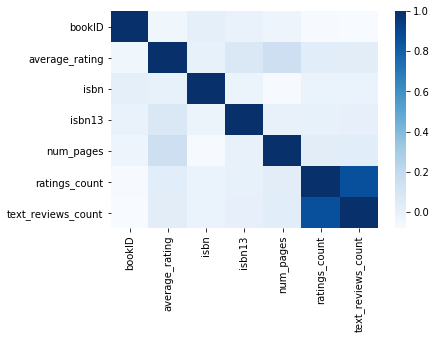

In [181]:
corrMatrix=books.corr()
sns.heatmap(corrMatrix,annot=False,cmap='Blues')
plt.show()

In [182]:
# books count by title
book_name = books.title.value_counts().to_frame().reset_index()
book_name.rename(columns={'title':'Count','index':'title'},inplace=True)
book_name.sort_values(by='Count',ascending=False)

,title,Count
0,The Iliad,9
1,The Brothers Karamazov,9
2,Gulliver's Travels,8
3,Anna Karenina,8
4,The Odyssey,8
5,'Salem's Lot,8
6,The Picture of Dorian Gray,7
7,A Midsummer Night's Dream,7
13,The Histories,6
18,The Great Gatsby,6


In [183]:
#top 10 most popular book
book_name_10=book_name.iloc[:10]
book_name_10

,title,Count
0,The Iliad,9
1,The Brothers Karamazov,9
2,Gulliver's Travels,8
3,Anna Karenina,8
4,The Odyssey,8
5,'Salem's Lot,8
6,The Picture of Dorian Gray,7
7,A Midsummer Night's Dream,7
8,Collected Stories,6
9,Jane Eyre,6


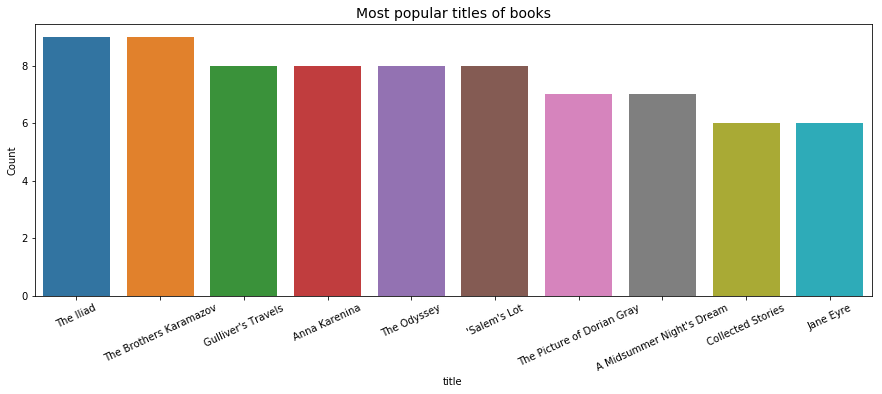

In [184]:
plt.figure(figsize =[15,5])
sns.barplot(book_name_10.title,book_name_10.Count)
plt.title('Most popular titles of books',fontsize=14)
plt.xticks(rotation=25);

Observations

'The Iliad', 'The Brothers Karamazov', "A Midsummer Night's Dream", 'Anna Karenina', 'The Odyssey', "Gulliver's Travels", 'Collected Stories', 'The Great Gatsby', 'Robinson Crusoe', 'The Histories'

Are the top 10 popular titles.

# Books by author

In [281]:
# book counts by authos
book_author = books['authors'].value_counts().to_frame().reset_index()
book_author.rename(columns={'authors':'Count','index':'Author'},inplace=True)
book_author.sort_values(by='Count',ascending=False)

,Author,Count
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33
5,Piers Anthony,30
6,Sandra Brown,29
7,Mercedes Lackey,29
8,Dick Francis,28
12,James Patterson,23


In [282]:
book_count=book_author[book_author['Count']>=30]
book_count

,Author,Count
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33
5,Piers Anthony,30


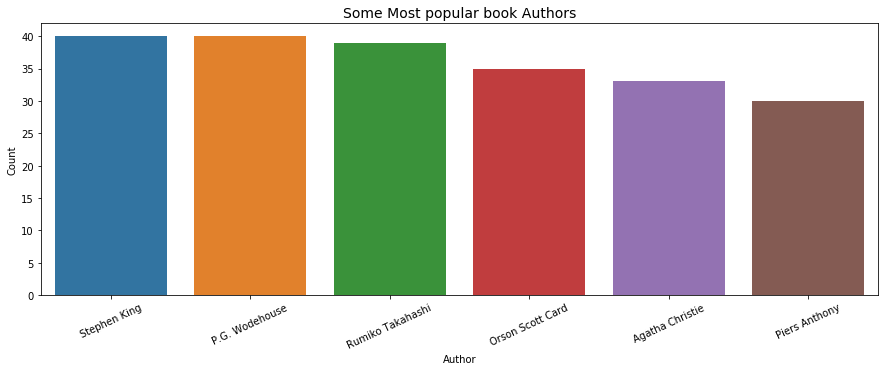

In [284]:
plt.figure(figsize =[15,5])
sns.barplot(book_count.Author,book_count.Count)
plt.title('Some Most popular book Authors',fontsize=14)
plt.xticks(rotation=25);

Observations:-

Following authors have maximum number of books count  :-

Stephen King	40

P.G. Wodehouse	40

Rumiko Takahashi	39

Orson Scott Card	35

Agatha Christie	33

Piers Anthony	30



# Books by average_ratring

In [185]:
#books min ad max average count
print('highest average rating = ',books['average_rating'].max())
print('lowest average rating =',books['average_rating'].min())

highest average rating =  5.0
lowest average rating = 0.0


In [186]:
#books details having maximum average_rating
avg_rat = books[books['average_rating'] == books['average_rating'].max()]
print('Total number of books with highest average rating = ',len(avg_rat))
avg_rat

Total number of books with highest average rating =  22


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,198145047,9.780200e+12,grc,364,0,0,2/22/1922,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,0,9.783830e+12,eng,83,1,0,09-01-2006,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,439271711,9.780440e+12,eng,32,4,1,01-01-2002,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,738511676,9.780740e+12,eng,128,2,0,3/17/2003,Arcadia Publishing
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.780740e+12,eng,128,2,0,03-06-2003,BradyGames
4790,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9.781890e+12,eng,74,5,3,02-01-2006,Square One Publishers
4935,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,533017424,9.780530e+12,eng,202,4,0,01-01-1975,Vantage Press
5025,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,851621813,9.780850e+12,eng,96,1,0,06-01-2004,Boosey & Hawkes Inc
5476,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,563388692,9.780560e+12,eng,2,3,0,04-01-1996,BBC Physical Audio
5478,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,563388323,9.780560e+12,eng,2,2,0,10-02-1995,BBC Physical Audio


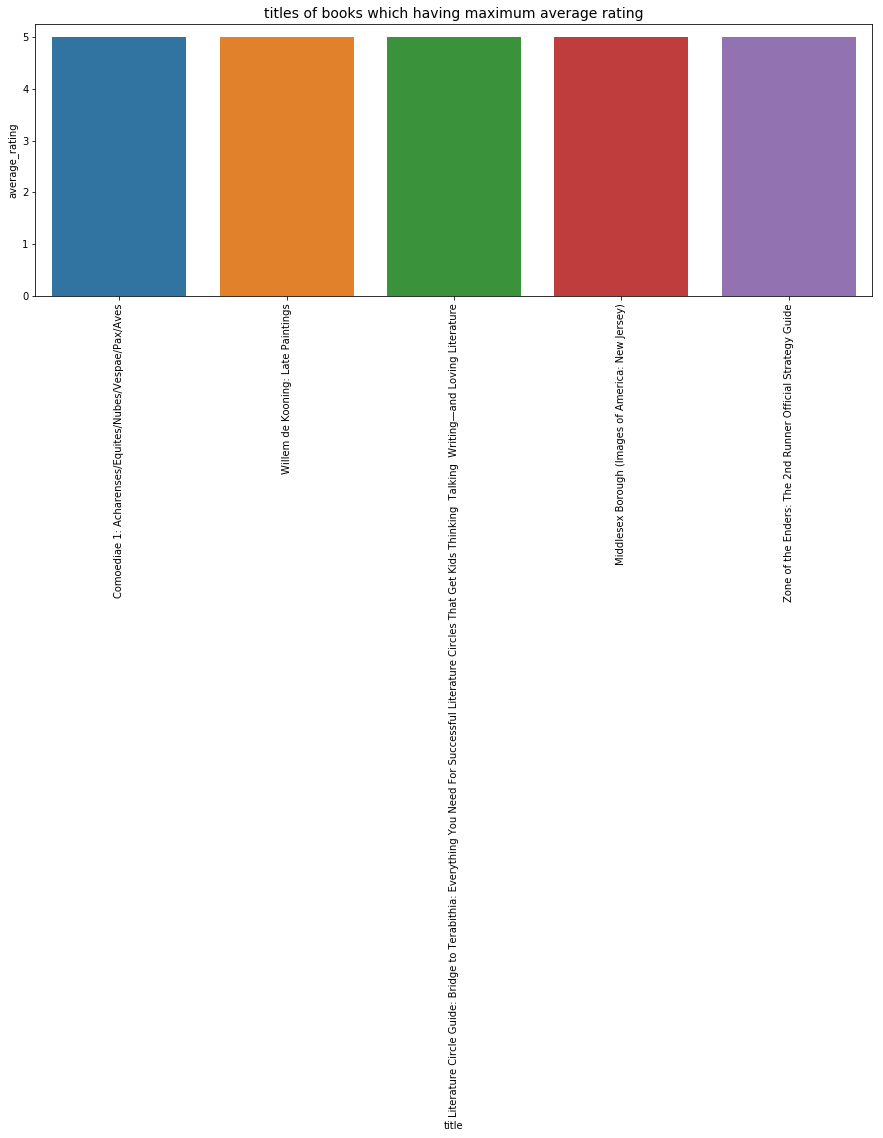

In [187]:
#Graphical represenation of books having maximum average rating
book_avg_count_5=avg_rat.iloc[:5]
plt.figure(figsize =[15,5])
sns.barplot(book_avg_count_5.title,book_avg_count_5.average_rating)
plt.title('titles of books which having maximum average rating',fontsize=14)
plt.xticks(rotation=90);


In [188]:
#books details having mimimum average_rating
avg_rat_min= books[books['average_rating'] == books['average_rating'].min()]
print('Total number of books with highest average rating = ',len(avg_rat_min))
avg_rat_min[:10]

Total number of books with highest average rating =  29


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9.781740e+12,eng,295,0,0,09-01-2001,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,744005612,9.780740e+12,eng,112,0,0,06-01-2005,BradyGames
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,0,9.781890e+12,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9.781930e+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9.781930e+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,-2147483648,9.788640e+12,srp,222,0,0,01-01-1996,"Izdavačka agencija ""Draganić"""
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,0.0,3,6.748421e+08,9.78067E+12,0,236,61,6,4/20/2004
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,333581296,9.780330e+12,eng,71,0,0,8/20/1992,Macmillan
4242,15186,American Film Guide,Frank N. Magill,0.0,893562505,9.780890e+12,eng,5,0,0,01-01-1983,Salem Press Inc
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,415940478,9.780420e+12,eng,386,0,0,11-08-2002,Routledge


Observation:-

    There are 22 books having maximum average rating i.e 5. 
   
Books having maximum average ratings are:-

      '624      Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
786                      Willem de Kooning: Late Paintings
855      Literature Circle Guide: Bridge to Terabithia:...
1243     Middlesex Borough (Images of America: New Jersey)
4126     Zone of the Enders: The 2nd Runner Official St...
4790     The Diamond Color Meditation: Color Pathway to...
4935     Bulgakov's the Master and Margarita: The Text ...
5025     The Complete Theory Fun Factory: Music Theory ...
5476     The Goon Show  Volume 4: My Knees Have Fallen ...
5478     The Goon Show  Volume 11: He's Fallen in the W...
5649                                   Winchester Shotguns
5650     Colossians and Philemon: A Critical and Exeget...
6187                             Taxation of Mineral Rents
6250                           The New Big Book of America
6778     Delwau Duon: Peintiadau Nicholas Evans = Symph...
8547          Fanning the Flame: Bible  Cross  and Mission
9286     Oliver Wendell Holmes in Paris: Medicine  Theo...
9328                    Tyrannosaurus Wrecks (Stanley  #1)
9724         The Irish Anatomist: A Study of Flann O'Brien
9851     The American Campaign: U.S. Presidential Campa...
9897     His Princess Devotional: A Royal Encounter Wit...
10266           Bill Gates: Computer Legend (Famous Lives)

    
And there are 29 books having minimum average rating i.e 0
   
Books having minimum average ratings are:-

      '265      Out to Eat London 2002 (Lonely Planet Out to Eat)
375                         Juiced Official Strategy Guide
987               Open City 6: The Only Woman He Ever Left
2532     How To Meditate: An Anthology Of Talks On Medi...
2533            Insights: Talks On The Nature Of Existence
2758                   Venac sonetnih venaca; Puževa srma
3348     Streetcar Suburbs: The Process of Growth in Bo...
3493     Brodie's notes on Aldous Huxley's brave new world
4242                                   American Film Guide
4678     The Man and the Author: John Milton: Twentieth...
4702                     The Tolkien Fan's Medieval Reader
5325     Canopy: A Work for Voice and Light in Harvard ...
5877                        Patriots (The Coming Collapse)
6383            Laguna  I Love You: The Best of "Our Town"
6561                     American Writers  Supplement VIII
6862                              The Road To War  1933 39
6880     I'll Be Home Before Midnight and I Won't Get P...
7147     Mythographi Graeci 1: Apollodori Bibliotheca  ...
7402                      Sclerotherapy and vein treatment
7576                              The Berlin Phenomenology
7637          Your Child and Jesus: A Family Activity Book
7800                     Beckett Football Card Price Guide
8979     Brown's Star Atlas: Showing All The Bright Sta...
9335         Random House Crossword Mega Omnibus  Volume 1
9441     Classroom Interactions as Cross-Cultural Encou...
10142                                        Day and Night
10501    The Fantastic Vampire: Studies in the Children...
10921    The Leadership Challenge: Skills for Taking Ch...
11031    Anthony Thwaite: In Conversation With Peter Da...'
        

# Recomentation

# 1.Books recomenataion by considering  books title.

In [239]:
#recomenation by book title
books_title=books.drop(['authors','language_code','publication_date','publisher'],axis=1)

In [240]:
books_users=books_title.pivot(index=None,columns='bookID',values='average_rating').fillna(0)
matrix_books_users=csr_matrix(books_users.values)
print(matrix_books_users)

  (0, 0)	4.57
  (1, 1)	4.49
  (2, 2)	4.42
  (3, 3)	4.56
  (4, 4)	4.78
  (5, 5)	3.74
  (6, 6)	4.73
  (7, 7)	4.38
  (8, 8)	4.38
  (9, 9)	4.22
  (10, 10)	4.22
  (11, 11)	4.38
  (12, 12)	4.21
  (13, 13)	3.44
  (14, 14)	3.87
  (15, 15)	4.07
  (16, 16)	3.9
  (17, 17)	3.83
  (18, 18)	3.86
  (19, 19)	3.91
  (20, 20)	3.93
  (21, 21)	4.59
  (22, 22)	4.5
  (23, 23)	4.36
  (24, 24)	4.5
  :	:
  (11102, 11102)	4.21
  (11103, 11103)	4.13
  (11104, 11104)	4.11
  (11105, 11105)	4.05
  (11106, 11106)	4.09
  (11107, 11107)	4.05
  (11108, 11108)	3.56
  (11109, 11109)	3.9
  (11110, 11110)	3.66
  (11111, 11111)	3.92
  (11112, 11112)	3.92
  (11113, 11113)	4.13
  (11114, 11114)	4.26
  (11115, 11115)	3.96
  (11116, 11116)	4.03
  (11117, 11117)	3.92
  (11118, 11118)	4.04
  (11119, 11119)	4.09
  (11120, 11120)	3.97
  (11121, 11121)	3.69
  (11122, 11122)	4.06
  (11123, 11123)	4.08
  (11124, 11124)	3.96
  (11125, 11125)	3.72
  (11126, 11126)	3.91


In [241]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=10)

In [242]:
knn.fit(matrix_books_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [243]:
# function for book recommention by its title
def recommender(book_title,data, model,n_recommentation):
    model.fit(data)
    idx=process.extractOne(book_title,books_title['title'])[2]
    print("Books selected:-",books_title['title'][idx],'Index:',idx)
    print('Searching for book recommendation.....')
    distances,indices=model.kneighbors(data[idx],n_neighbors=n_recommentation)
    for i in indices:
        print(books_title['title'][i].where(i!=idx))

In [244]:
#recomend book by considering book 'Bill Bryson's African Diary'
recommender("Bill Bryson's African Diary",matrix_books_users,knn,5)

Books selected:- Bill Bryson's African Diary Index: 13
Searching for book recommendation.....
13                                                    NaN
7419                                          New Amazons
7417    The Soulforge (Dragonlance: Raistlin Chronicle...
7420                          Nightsword (Starshield  #2)
7422               Well of Darkness (Sovereign Stone  #1)
Name: title, dtype: object


In [201]:
#recomend book by considering book 'Comoediae 1'
recommender("Comoediae 1",matrix_books_users,knn,5)

Movies slected:- Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves Index: 624
Searching for book recommendation.....
624                                                   NaN
7416                                Starshield: Sentinels
7419                                          New Amazons
7418    Love and War: Tales  Volume Three (Dragonlance...
7421    Realms of Dragons: The Universes of Margaret W...
Name: title, dtype: object


# 2.Books recomenataion by considering  books authors.

In [263]:
books_recom=books.drop(['language_code','publication_date','publisher'],axis=1)

In [264]:
books_author=books_recom.pivot(index=None,columns='bookID',values='average_rating').fillna(0)
matrix_books_author=csr_matrix(books_author.values)
print(matrix_books_author)

  (0, 0)	4.57
  (1, 1)	4.49
  (2, 2)	4.42
  (3, 3)	4.56
  (4, 4)	4.78
  (5, 5)	3.74
  (6, 6)	4.73
  (7, 7)	4.38
  (8, 8)	4.38
  (9, 9)	4.22
  (10, 10)	4.22
  (11, 11)	4.38
  (12, 12)	4.21
  (13, 13)	3.44
  (14, 14)	3.87
  (15, 15)	4.07
  (16, 16)	3.9
  (17, 17)	3.83
  (18, 18)	3.86
  (19, 19)	3.91
  (20, 20)	3.93
  (21, 21)	4.59
  (22, 22)	4.5
  (23, 23)	4.36
  (24, 24)	4.5
  :	:
  (11102, 11102)	4.21
  (11103, 11103)	4.13
  (11104, 11104)	4.11
  (11105, 11105)	4.05
  (11106, 11106)	4.09
  (11107, 11107)	4.05
  (11108, 11108)	3.56
  (11109, 11109)	3.9
  (11110, 11110)	3.66
  (11111, 11111)	3.92
  (11112, 11112)	3.92
  (11113, 11113)	4.13
  (11114, 11114)	4.26
  (11115, 11115)	3.96
  (11116, 11116)	4.03
  (11117, 11117)	3.92
  (11118, 11118)	4.04
  (11119, 11119)	4.09
  (11120, 11120)	3.97
  (11121, 11121)	3.69
  (11122, 11122)	4.06
  (11123, 11123)	4.08
  (11124, 11124)	3.96
  (11125, 11125)	3.72
  (11126, 11126)	3.91


In [265]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=10)

In [266]:
knn.fit(matrix_books_author)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [270]:
# function for book recommention by its author
def recommend_by_authors(book_author,data, model,n_recommentation):
    model.fit(data)
    idx=process.extractOne(book_author,books_recom['authors'])[2]
    print("Books selected by its author:-",books_recom['authors'][idx],'Index:',idx)
    print('Searching for book recommendation .....')
    distances,indices=model.kneighbors(data[idx],n_neighbors=n_recommentation)
    for i in indices:
        print(books_recom['title'][i].where(i!=idx))

In [271]:

recommend_by_authors("J.K. Rowling/Mary GrandPré",matrix_books_author,knn,5)

Books selected by its author:- J.K. Rowling/Mary GrandPré Index: 0
Searching for book recommendation.....
0                                                     NaN
7418    Love and War: Tales  Volume Three (Dragonlance...
7420                          Nightsword (Starshield  #2)
7419                                          New Amazons
7416                                Starshield: Sentinels
Name: title, dtype: object


In [272]:
recommend_by_authors("C.S. Lewis/Ana Falcão Bastos",matrix_books_author,knn,5)

Books selected by its author:- C.S. Lewis/Ana Falcão Bastos Index: 11115
Searching for book recommendation.....
11115                                                  NaN
7418     Love and War: Tales  Volume Three (Dragonlance...
7420                           Nightsword (Starshield  #2)
7419                                           New Amazons
7421     Realms of Dragons: The Universes of Margaret W...
Name: title, dtype: object


# Bivariate
Numerical¶

https://pypi.org/project/sci-analysis/1.3.5/

In [273]:
from sci_analysis import analyze

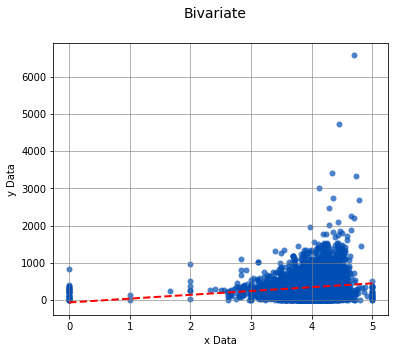



Linear Regression
-----------------

n         =  11127
Slope     =  102.7548
Intercept = -67.8154
r         =  0.1526
r^2       =  0.0233
Std Err   =  6.3079
p value   =  0.0000



C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")




Spearman Correlation Coefficient
--------------------------------

alpha   =  0.0500
r value =  0.1109
p value =  0.0000

HA: There is a significant relationship between predictor and response



In [274]:
analyze(books.average_rating,books.num_pages)